# Breast Cancer Machine Learning Project
The aim to predict whether the cancer tumor is malignant or benign.

## Introduction

Breast cancer, the second most common cancer across the world after lung cancer, is by far the most frequent cause of cancer death in women [1]. The best approach to lessen breast tumor passing is recognize it prior. Early finding requires an exact and solid determination method that enables doctors to recognize breast tumours from dangerous ones without going for surgical biopsy [2]. This project is undertaken to develop machine learning models that can recognize malignant and benign tumors. Using the Breast Cancer Wisconsin (Diagnostic) Database, we can create a classifier that can help diagnose patients and predict the likelihood of a breast cancer [3] (dataset reference). 





### About Dataset
Data can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

Attribute Information:

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
plt.style.use("ggplot")
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

In [8]:
# read dataset 
data_raw = pd.read_csv("data.csv")

In [9]:
# quick look to data
data_raw.shape # (569, 31)
data_raw.head()



,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [10]:
# check for a summary
data_raw.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


There are 4 things to take into consideration: 1) There is an id that cannot be used for classificaiton 2) Diagnosis is our class label 3) Unnamed: 32 feature includes NaN so we do not need it. 4) We do not know what exactly are the other feature names due to their medical concepts. However, with the power of machine learning we can use these features to train our model.

In [39]:
# id column is useless and Unamed: 32 column is empty, so we can drop them
data = data_raw.drop(['Unnamed: 32','id'],axis = 1)


In [12]:
# check for missing values 
missing_values=data.isnull().sum()
percent_missing = data.isnull().sum()/data.shape[0]*100

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing
}
miss=pd.DataFrame(value)
miss

,missing_values,percent_missing %
diagnosis,0,0.0
radius_mean,0,0.0
texture_mean,0,0.0
perimeter_mean,0,0.0
area_mean,0,0.0
smoothness_mean,0,0.0
compactness_mean,0,0.0
concavity_mean,0,0.0
concave points_mean,0,0.0
symmetry_mean,0,0.0


In [40]:
# checking the distribution of Target Varibale (Benign or Malignant)
data["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

# Exploratory Data Analysis

### Histogram
How many times each value appears in dataset. This description is called the distribution of variable
Most common way to represent distribution of varible is histogram that is graph which shows frequency of each value.
Frequency = number of times each value appears

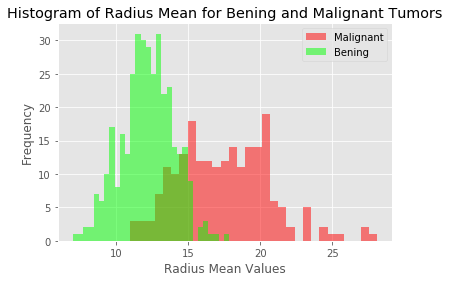

Most frequent malignant radius mean is:  20.101999999999997


In [7]:
m = plt.hist(data[data["diagnosis"] == "M"].radius_mean,bins=30,fc = (1,0,0,0.5),label = "Malignant")
b = plt.hist(data[data["diagnosis"] == "B"].radius_mean,bins=30,fc = (0,1,0,0.5),label = "Bening")
plt.legend()
plt.xlabel("Radius Mean Values")
plt.ylabel("Frequency")
plt.title("Histogram of Radius Mean for Bening and Malignant Tumors")
plt.show()
frequent_malignant_radius_mean = m[0].max()
index_frequent_malignant_radius_mean = list(m[0]).index(frequent_malignant_radius_mean)
most_frequent_malignant_radius_mean = m[1][index_frequent_malignant_radius_mean]
print("Most frequent malignant radius mean is: ",most_frequent_malignant_radius_mean)

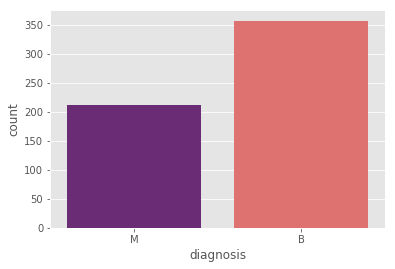

In [24]:
# quick look at the frequency of cancer stages
sns.countplot(data['diagnosis'], palette= 'magma')

Lets look at other conclusions
From this graph you can see that radius mean of malignant tumors are bigger than radius mean of bening tumors mostly.
The bening distribution (green in graph) is approcimately bell-shaped that is shape of normal distribution (gaussian distribution)
Also you can find result like that most frequent malignant radius mean is



### Correlation
Strength of the relationship between two variables.
Lets look at correlation between all features.

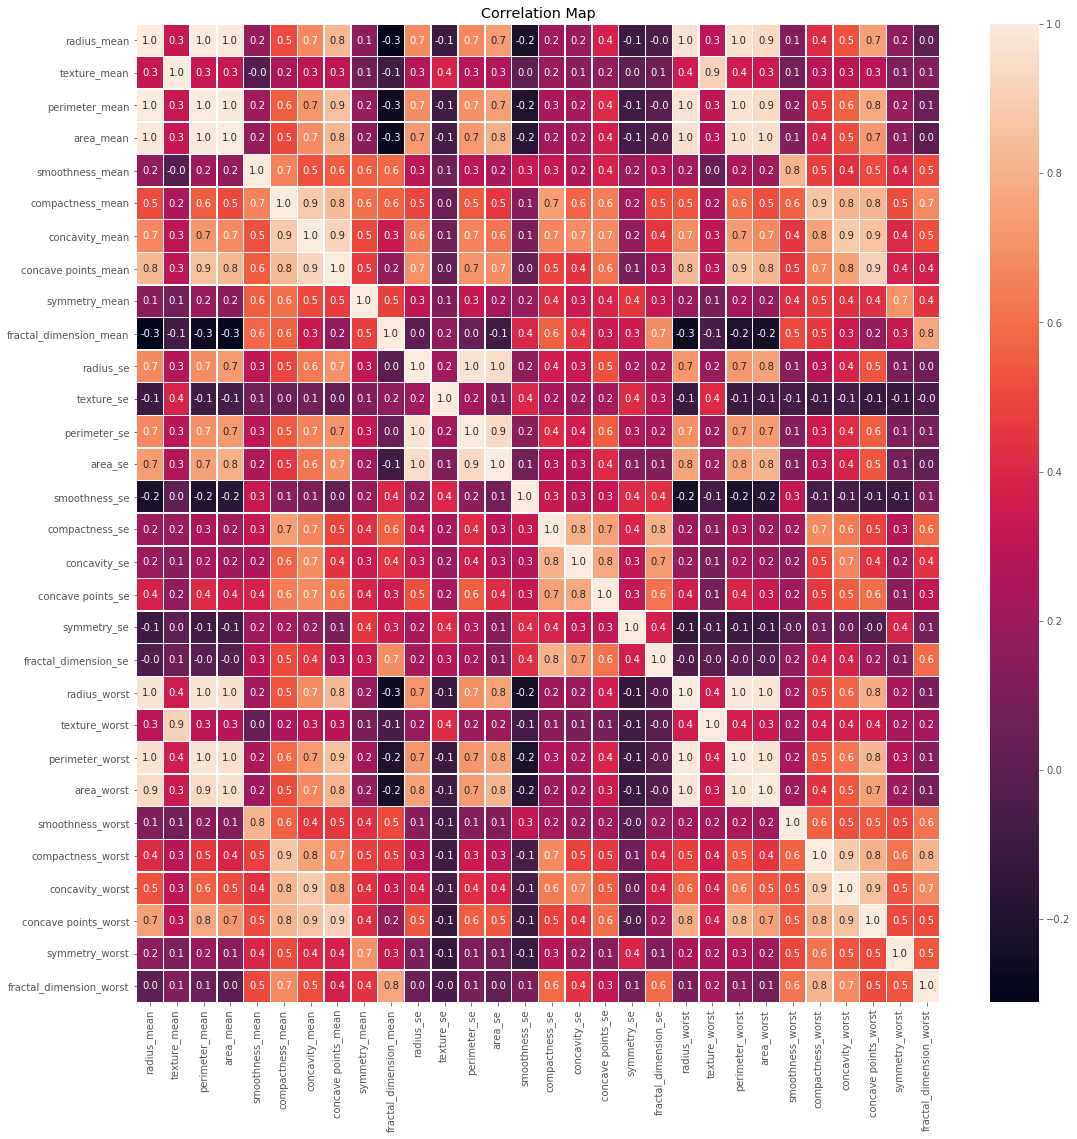

In [10]:
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(data.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.savefig('graph.png')
plt.show()

Huge matrix that includes a lot of numbers.
The range of this numbers are -1 to 1.
Meaning of 1 is two variable are positively correlated with each other like radius mean and area mean
Meaning of zero is there is no correlation between variables like radius mean and fractal dimension se
Meaning of -1 is two variables are negatively correlated with each other like radius mean and fractal dimension mean.Actually correlation between of them is not -1, it is -0.3 but the idea is that if sign of correlation is negative that means that there is negative correlation.
From heatmap, we can observe that there are many negative correlations.

In [41]:
# 2.1 Data Preprocessing¶
## mapping categorical values to numerical values
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})


In [42]:
data['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [32]:
## Encoding categorical data
X = data.iloc[:,2:].values
y = data.iloc[:,1].values

In [ ]:
print(y)

In [33]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

TypeError: an integer is required (got type bytes)

## References

[1] Dubey, A. K., Gupta, U., & Jain, S. (2016). Analysis of k-means clustering approach on the breast cancer Wisconsin dataset. International journal of computer assisted radiology and surgery, 11(11), 2033-2047.

[2] Sayed, S., Ahmed, S., & Poonia, R. (2017, November). Holo entropy enabled decision tree classifier for breast cancer diagnosis using wisconsin (prognostic) data set. In 2017 7th International Conference on Communication Systems and Network Technologies (CSNT) (pp. 172-176). IEEE.